<a href="https://colab.research.google.com/github/arunbalajiii/Accredian_Internship_task/blob/main/Accredian_internship_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Load the data from Google Drive
file_path = '/content/drive/My Drive/Fraud.csv'  # Change this to your file path
data = pd.read_csv(file_path)

# Check the first few rows of the data
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#data cleaning

In [6]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (e.g., using forward fill or mean)
data.fillna(method='ffill', inplace=True)


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


<ipython-input-6-d81b9b67bae5>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


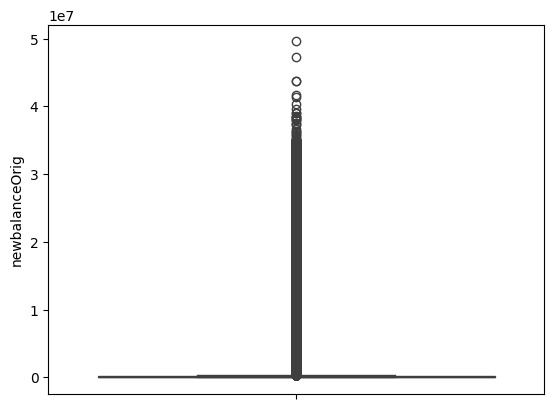

In [11]:
#Handle Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Plot to check for outliers in a column
sns.boxplot(data['newbalanceOrig'])
plt.show()


In [12]:
#Check for Multicollinearity

In [14]:
# Check data types of all columns
print(data.dtypes)


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


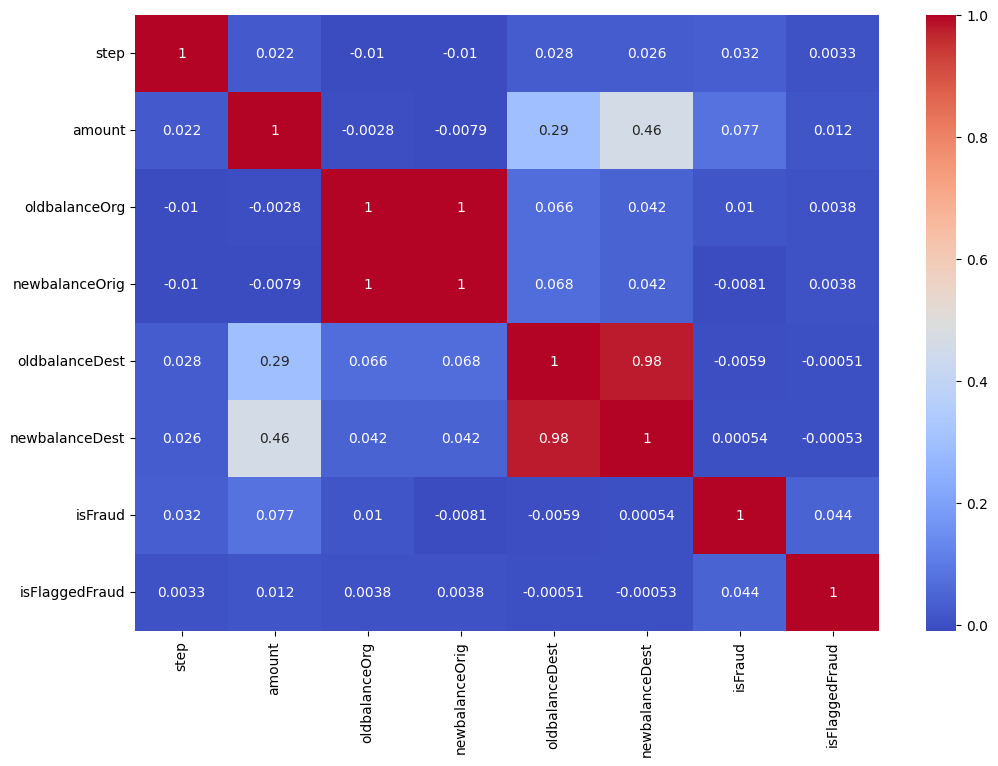

In [15]:
# Drop non-numeric columns
data_numeric = data.select_dtypes(include=[float, int])

# Plot correlation matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()


In [22]:
# Check the data types of all columns
print(X.dtypes)

# Find non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
dtype: object
Non-numeric columns: Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [17]:
print(data.columns)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [24]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Apply Label Encoding to each non-numeric column
for col in non_numeric_columns:
    X[col] = labelencoder.fit_transform(X[col])


In [29]:
# Fit the model
model = ExtraTreesClassifier()
model.fit(X, y)

# Display feature importance
print(model.feature_importances_)


[0.12822545 0.02390311 0.19095204 0.04229723 0.27842852 0.06223506
 0.04399924 0.05612592 0.17224556 0.00158786]


In [30]:
# Model Development

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [40]:
# Model Evaluation

In [39]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.77      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



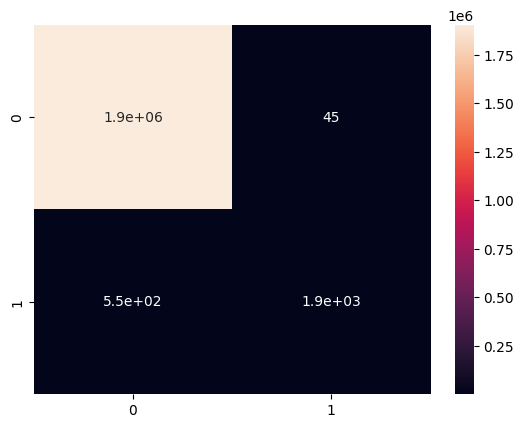

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()


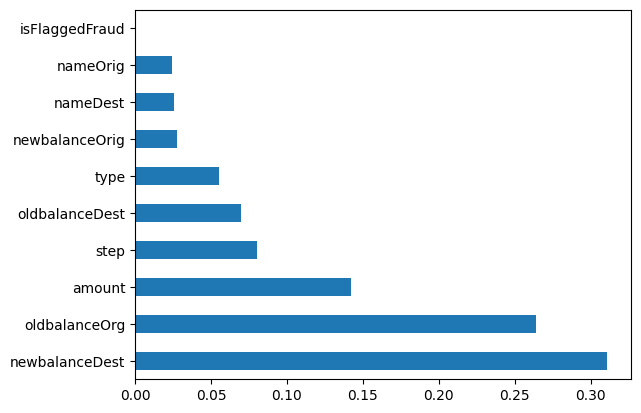

In [35]:
# Key Factors for Fraud Detection
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()
